In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, learning_curve
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [2]:
# Load the dataset
df = pd.read_csv("./DBtrainrides_complete_preprocessed_2.csv")

In [3]:
df.head()

,ID_Base,ID_Timestamp,stop_number,IBNR,long,lat,arrival_plan,departure_plan,arrival_delay_m,transformed_info_message,prev_arrival_delay_m,prev_departure_delay_m,weighted_avg_prev_delay,max_station_number,station_progress,info_label_encoded,arrival_normalized,departure_normalized
0,-1001326572688500578,2407082041,2,8011118.0,13.375988,52.509379,2024-07-08 20:44:00,2024-07-08 20:45:00,0.0,No message,0.0,0.0,0.000000,7,0.285714,0,0.125866,0.125965
1,-1001326572688500578,2407082041,3,8011160.0,9.095851,48.849792,2024-07-08 20:50:00,2024-07-08 20:50:00,0.0,No message,0.0,0.0,0.000000,7,0.428571,0,0.126460,0.126460
2,-1001326572688500578,2407082041,4,8011167.0,13.299437,52.530276,2024-07-08 20:55:00,2024-07-08 20:56:00,0.0,No message,0.0,0.0,0.000000,7,0.571429,0,0.126954,0.127053
3,-1001326572688500578,2407082041,5,8010404.0,13.196898,52.534648,2024-07-08 21:00:00,2024-07-08 21:03:00,2.0,No message,0.0,0.0,0.000000,7,0.714286,0,0.127449,0.127746
4,-1001326572688500578,2407082041,6,8080040.0,13.128917,52.549396,2024-07-08 21:06:00,2024-07-08 21:07:00,1.0,No message,2.0,0.0,0.666667,7,0.857143,0,0.128043,0.128142


In [3]:
# Assuming custom_train_test_split and other utilities are available
import sys
import os
sys.path.append(os.path.abspath(os.path.join('../utils')))  # Add utils to path
from utils.utils import custom_train_test_split

# Linear Regression

In [5]:
param_space = {'copy_X': [True,False], 
               'fit_intercept': [True,False], 
               'n_jobs': [1,5,10,15,None], 
               'positive': [True,False]}

In [4]:
# Custom train-test split
X_train, y_train, X_test, y_test = custom_train_test_split(df, "arrival_delay_m", 0.8)

In [7]:
linear_regressor = LinearRegression()

grid_search_lr = GridSearchCV(linear_regressor, param_space, cv=5)
grid_search_lr.fit(X_train, y_train) 

linear_regressor = grid_search_lr.best_estimator_

y_pred_lr = grid_search_lr.predict(X_test)

In [8]:
# Evaluate Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print("Linear Regression:")
print(f"Mean Squared Error: {mse_lr}")
print(f"R-squared Score: {r2_lr}")
print("Mean Absolute Error:", mae_lr)

Linear Regression:
Mean Squared Error: 4.2823660561048555
R-squared Score: 0.5890830588510816
Mean Absolute Error: 0.7380460578791739


# Lasso Regression with Hyperparameter Tuning

In [9]:
param_grid = {'alpha': np.logspace(-4, 0, 10)}  # Testing alphas from 0.01 to 1 # Regularisation strength
lasso = Lasso()
grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', cv=5, verbose=1)
grid_search_lasso.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/root/.virtualenvs/DM-Project/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.325e+06, tolerance: 1.230e+03
  model = cd_fast.enet_coordinate_descent(
/root/.virtualenvs/DM-Project/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.372e+06, tolerance: 1.245e+03
  model = cd_fast.enet_coordinate_descent(
/root/.virtualenvs/DM-Project/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-04, 2.78255940e-04, 7.74263683e-04, 2.15443469e-03,
       5.99484250e-03, 1.66810054e-02, 4.64158883e-02, 1.29154967e-01,
       3.59381366e-01, 1.00000000e+00])},
             scoring='r2', verbose=1)

In [10]:
# Best Lasso Model
best_lasso = grid_search_lasso.best_estimator_
y_pred_lasso = best_lasso.predict(X_test)

In [11]:
# Evaluate Lasso Regression
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

print("Lasso Regression:")
print(f"Best Alpha: {grid_search_lasso.best_params_['alpha']}")
print(f"Mean Squared Error: {mse_lasso}")
print(f"R-squared Score: {r2_lasso}")
print(f"Mean Absolute Error:, {mae_lasso}")

Lasso Regression:
Best Alpha: 0.0001
Mean Squared Error: 4.24060504906048
R-squared Score: 0.5930902607224653
Mean Absolute Error:, 0.7359703111242482


In [12]:
features = X_train.columns
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': best_lasso.coef_})
print("Feature Importance (Lasso):")
coefficients

Feature Importance (Lasso):


,Feature,Coefficient
0,ID_Base,8.977971e-23
1,ID_Timestamp,8.084173e-07
2,stop_number,-8.940636e-03
3,IBNR,1.017358e-08
4,long,-5.703428e-03
5,lat,-3.869191e-02
6,prev_arrival_delay_m,-1.794580e-01
7,prev_departure_delay_m,7.061064e-01
8,weighted_avg_prev_delay,5.380550e-01
9,max_station_number,1.281176e-03


In [13]:
# Cross-Validation for Both Models
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [14]:
# Cross-validation for Linear Regression
cv_scores_lr = cross_val_score(linear_regressor, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
print(f"Linear Regression Cross-Validation MAE: {-np.mean(cv_scores_lr):.4f} ± {np.std(cv_scores_lr):.4f}")

Linear Regression Cross-Validation MAE: 0.7116 ± 0.0027


In [15]:
# Cross-validation for Lasso
cv_scores_lasso = cross_val_score(best_lasso, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
print(f"Lasso Regression Cross-Validation MAE: {-np.mean(cv_scores_lasso):.4f} ± {np.std(cv_scores_lasso):.4f}")

/root/.virtualenvs/DM-Project/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.326e+06, tolerance: 1.221e+03
  model = cd_fast.enet_coordinate_descent(
/root/.virtualenvs/DM-Project/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.355e+06, tolerance: 1.237e+03
  model = cd_fast.enet_coordinate_descent(
/root/.virtualenvs/DM-Project/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

Lasso Regression Cross-Validation MAE: 0.7112 ± 0.0026


/root/.virtualenvs/DM-Project/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.337e+06, tolerance: 1.235e+03
  model = cd_fast.enet_coordinate_descent(


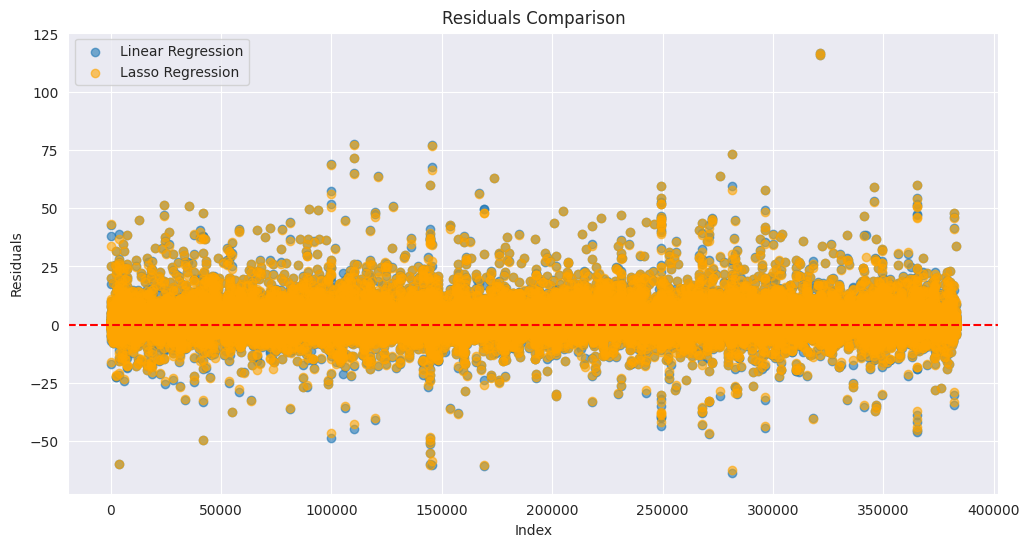

In [16]:
residuals_lr = y_test - y_pred_lr
residuals_lasso = y_test - y_pred_lasso

plt.figure(figsize=(12, 6))
plt.scatter(range(len(residuals_lr)), residuals_lr, alpha=0.6, label="Linear Regression")
plt.scatter(range(len(residuals_lasso)), residuals_lasso, alpha=0.6, label="Lasso Regression", color="orange")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.title('Residuals Comparison')
plt.legend()
plt.show()

In [17]:
# Linear Regression Learning Curve
train_sizes_lr, train_scores_lr, test_scores_lr = learning_curve(
    linear_regressor, X_train, y_train, cv=5, scoring="neg_mean_absolute_error", n_jobs=-1
)
train_scores_mean_lr = -np.mean(train_scores_lr, axis=1)
test_scores_mean_lr = -np.mean(test_scores_lr, axis=1)

# Lasso Regression Learning Curve
train_sizes_lasso, train_scores_lasso, test_scores_lasso = learning_curve(
    best_lasso, X_train, y_train, cv=5, scoring="neg_mean_absolute_error", n_jobs=-1
)
train_scores_mean_lasso = -np.mean(train_scores_lasso, axis=1)
test_scores_mean_lasso = -np.mean(test_scores_lasso, axis=1)

/root/.virtualenvs/DM-Project/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.663e+05, tolerance: 4.044e+02
  model = cd_fast.enet_coordinate_descent(
/root/.virtualenvs/DM-Project/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.660e+05, tolerance: 4.018e+02
  model = cd_fast.enet_coordinate_descent(
/root/.virtualenvs/DM-Project/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing 

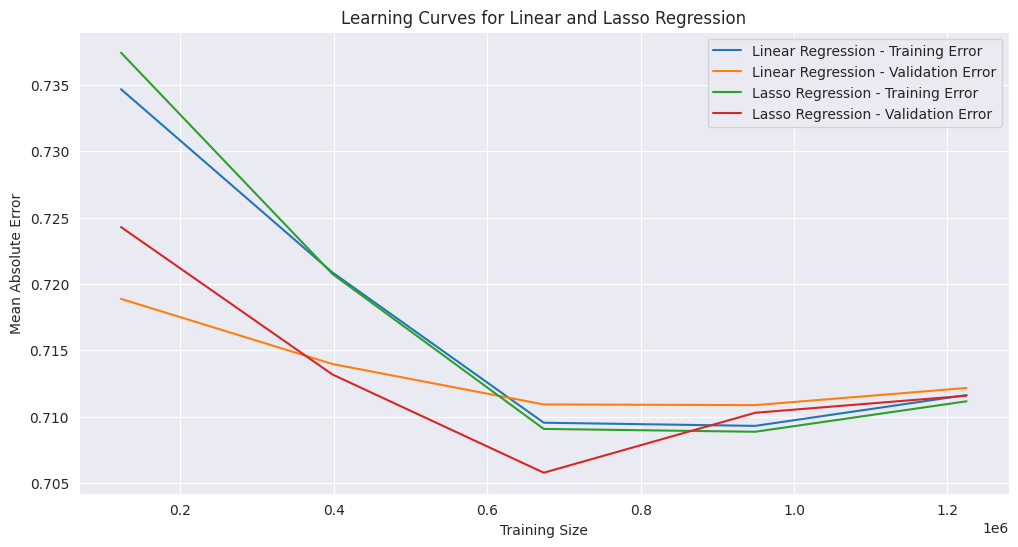

In [18]:
# Plot Learning Curves
plt.figure(figsize=(12, 6))

# Linear Regression Plot
plt.plot(train_sizes_lr, train_scores_mean_lr, label="Linear Regression - Training Error")
plt.plot(train_sizes_lr, test_scores_mean_lr, label="Linear Regression - Validation Error")

# Lasso Regression Plot
plt.plot(train_sizes_lasso, train_scores_mean_lasso, label="Lasso Regression - Training Error")
plt.plot(train_sizes_lasso, test_scores_mean_lasso, label="Lasso Regression - Validation Error")

plt.xlabel("Training Size")
plt.ylabel("Mean Absolute Error")
plt.title("Learning Curves for Linear and Lasso Regression")
plt.legend()
plt.show()

# Spatial MSE Linear Regression

/tmp/ipykernel_188575/1434921290.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spatial_mse = data.groupby(['lat_bin', 'lon_bin'])['squared_error'].mean().reset_index()


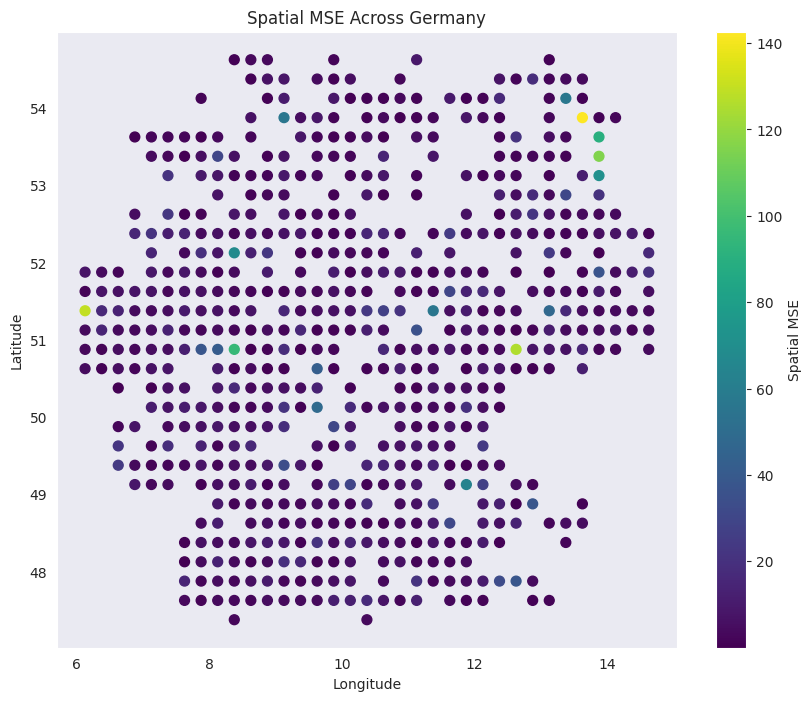

Overall Spatial MSE: 8.072386397769574


In [19]:
# Spatial MSE
# Define Germany's approximate geographic boundaries
germany_bounds = {
    'min_lat': 47.0, 'max_lat': 55.0,  # Latitude range
    'min_lon': 5.0, 'max_lon': 15.0  # Longitude range
}


# Create a grid over Germany
def create_grid(bounds, cell_size):
    lat_edges = np.arange(bounds['min_lat'], bounds['max_lat'], cell_size)
    lon_edges = np.arange(bounds['min_lon'], bounds['max_lon'], cell_size)
    return lat_edges, lon_edges


# Define grid cell size (in degrees)
cell_size = 0.25  # Adjust for desired resolution
lat_edges, lon_edges = create_grid(germany_bounds, cell_size)

# Assign test data points to grid cells
X_test['lat_bin'] = pd.cut(X_test['lat'], bins=lat_edges)
X_test['lon_bin'] = pd.cut(X_test['long'], bins=lon_edges)

# Combine with y_test and y_pred
data = pd.DataFrame({
    'lat_bin': X_test['lat_bin'],
    'lon_bin': X_test['lon_bin'],
    'y_test': y_test,
    'y_pred': y_pred_lr  # Using predictions from Linear Regression as an example
})

# Compute squared error
data['squared_error'] = (data['y_test'] - data['y_pred']) ** 2

# Group by grid cells and compute MSE
spatial_mse = data.groupby(['lat_bin', 'lon_bin'])['squared_error'].mean().reset_index()
spatial_mse.rename(columns={'squared_error': 'spatial_mse'}, inplace=True)

# Add grid cell centres for visualisation
spatial_mse['lat_center'] = spatial_mse['lat_bin'].apply(lambda x: x.mid)
spatial_mse['lon_center'] = spatial_mse['lon_bin'].apply(lambda x: x.mid)

# Visualise Spatial MSE
plt.figure(figsize=(10, 8))
plt.scatter(spatial_mse['lon_center'], spatial_mse['lat_center'], c=spatial_mse['spatial_mse'], cmap='viridis', s=50)
plt.colorbar(label='Spatial MSE')
plt.title('Spatial MSE Across Germany')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()

# Overall Spatial MSE
overall_spatial_mse = spatial_mse['spatial_mse'].mean()
print(f"Overall Spatial MSE: {overall_spatial_mse}")

# Spatial MSE Lasso Regression

/tmp/ipykernel_188575/2166562050.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spatial_mse = data.groupby(['lat_bin', 'lon_bin'])['squared_error'].mean().reset_index()


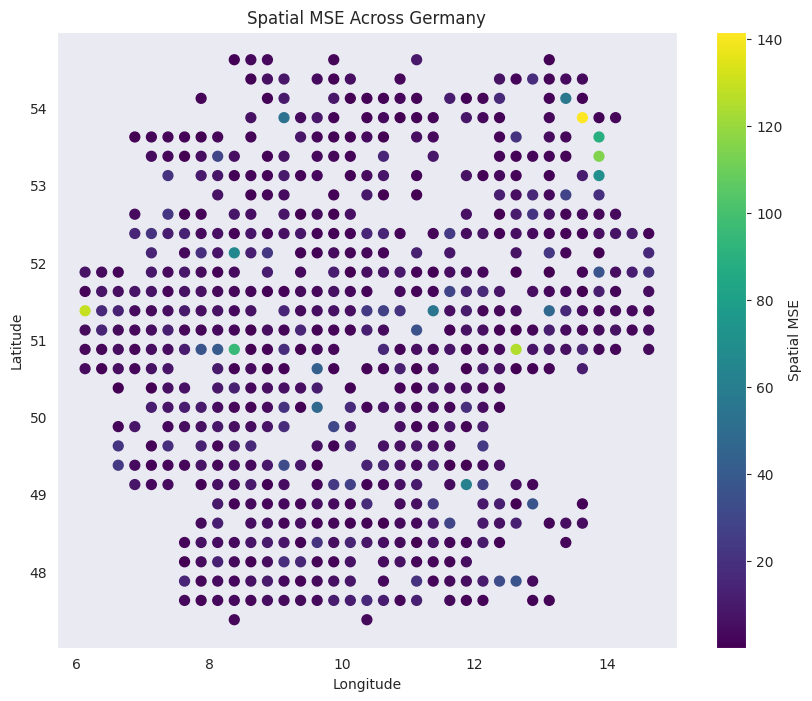

Overall Spatial MSE: 7.962874926759756


In [20]:
# Spatial MSE
# Define Germany's approximate geographic boundaries
germany_bounds = {
    'min_lat': 47.0, 'max_lat': 55.0,  # Latitude range
    'min_lon': 5.0, 'max_lon': 15.0  # Longitude range
}


# Create a grid over Germany
def create_grid(bounds, cell_size):
    lat_edges = np.arange(bounds['min_lat'], bounds['max_lat'], cell_size)
    lon_edges = np.arange(bounds['min_lon'], bounds['max_lon'], cell_size)
    return lat_edges, lon_edges


# Define grid cell size (in degrees)
cell_size = 0.25  # Adjust for desired resolution
lat_edges, lon_edges = create_grid(germany_bounds, cell_size)

# Assign test data points to grid cells
X_test['lat_bin'] = pd.cut(X_test['lat'], bins=lat_edges)
X_test['lon_bin'] = pd.cut(X_test['long'], bins=lon_edges)

# Combine with y_test and y_pred
data = pd.DataFrame({
    'lat_bin': X_test['lat_bin'],
    'lon_bin': X_test['lon_bin'],
    'y_test': y_test,
    'y_pred': y_pred_lasso  # Using predictions from Linear Regression as an example
})

# Compute squared error
data['squared_error'] = (data['y_test'] - data['y_pred']) ** 2

# Group by grid cells and compute MSE
spatial_mse = data.groupby(['lat_bin', 'lon_bin'])['squared_error'].mean().reset_index()
spatial_mse.rename(columns={'squared_error': 'spatial_mse'}, inplace=True)

# Add grid cell centres for visualisation
spatial_mse['lat_center'] = spatial_mse['lat_bin'].apply(lambda x: x.mid)
spatial_mse['lon_center'] = spatial_mse['lon_bin'].apply(lambda x: x.mid)

# Visualise Spatial MSE
plt.figure(figsize=(10, 8))
plt.scatter(spatial_mse['lon_center'], spatial_mse['lat_center'], c=spatial_mse['spatial_mse'], cmap='viridis', s=50)
plt.colorbar(label='Spatial MSE')
plt.title('Spatial MSE Across Germany')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()

# Overall Spatial MSE
overall_spatial_mse = spatial_mse['spatial_mse'].mean()
print(f"Overall Spatial MSE: {overall_spatial_mse}")

In [21]:
X_test.drop(['lat_bin', 'lon_bin'], axis=1, inplace=True)

In [22]:
X_test.head()

,ID_Base,ID_Timestamp,stop_number,IBNR,long,lat,prev_arrival_delay_m,prev_departure_delay_m,weighted_avg_prev_delay,max_station_number,station_progress,info_label_encoded,arrival_normalized,departure_normalized
41,-1001511359947692338,2407080805,2,8004489.0,8.158313,49.354245,0.0,2.0,0.0,5,0.4,0,0.050960,0.051059
42,-1001511359947692338,2407090805,2,8004489.0,8.158313,49.354245,0.0,0.0,0.0,5,0.4,0,0.193449,0.193548
43,-1001511359947692338,2407100805,2,8004489.0,8.158313,49.354245,0.0,0.0,0.0,5,0.4,0,0.335939,0.336038
44,-1001511359947692338,2407110805,2,8004489.0,8.158313,49.354245,0.0,0.0,0.0,5,0.4,0,0.478429,0.478528
45,-1001511359947692338,2407120805,2,8004489.0,8.158313,49.354245,0.0,1.0,0.0,5,0.4,0,0.620918,0.621017


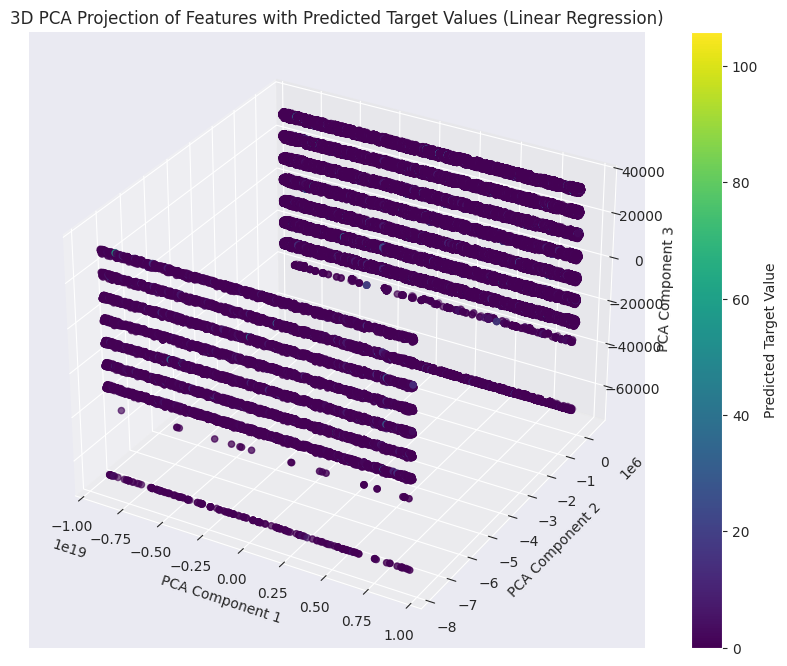

In [23]:
# 3D PCA Projection
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality to 3 components
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(X_test)

# Create a 3D scatter plot of the reduced features, coloured by predicted target values
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2],
    c=y_pred_lr, cmap='viridis'
)
fig.colorbar(scatter, label='Predicted Target Value')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.title('3D PCA Projection of Features with Predicted Target Values (Linear Regression)')
plt.show()

## Decision Tree Regressor: Training and Evaluation

## Perform Grid Search for Hyperparameter Tuning

In [37]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Define the parameter grid for Decision Tree
param_grid_tree = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'max_leaf_nodes': [10, 15, 20]
}

# Initialise a base Decision Tree Regressor
regression_tree = DecisionTreeRegressor(random_state=42)

# Set up GridSearchCV
grid_search_tree = GridSearchCV(
    estimator=regression_tree,
    param_grid=param_grid_tree,
    cv=5,
    n_jobs=-1,
    verbose=1  # Show progress
)

# Fit the GridSearchCV object to the training data
grid_search_tree.fit(X_train, y_train)

# Extract the best model and its parameters
best_tree = grid_search_tree.best_estimator_
print("Best Parameters:", grid_search_tree.best_params_)

# Use the best model for predictions
y_pred_tree = best_tree.predict(X_test)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': 5, 'max_leaf_nodes': 20, 'min_samples_split': 2}


Best Decision Tree Regressor:
Mean Absolute Error: 0.7661706945447364
Mean Squared Error: 4.1060265467023775
R-squared Score: 0.6060038196776971


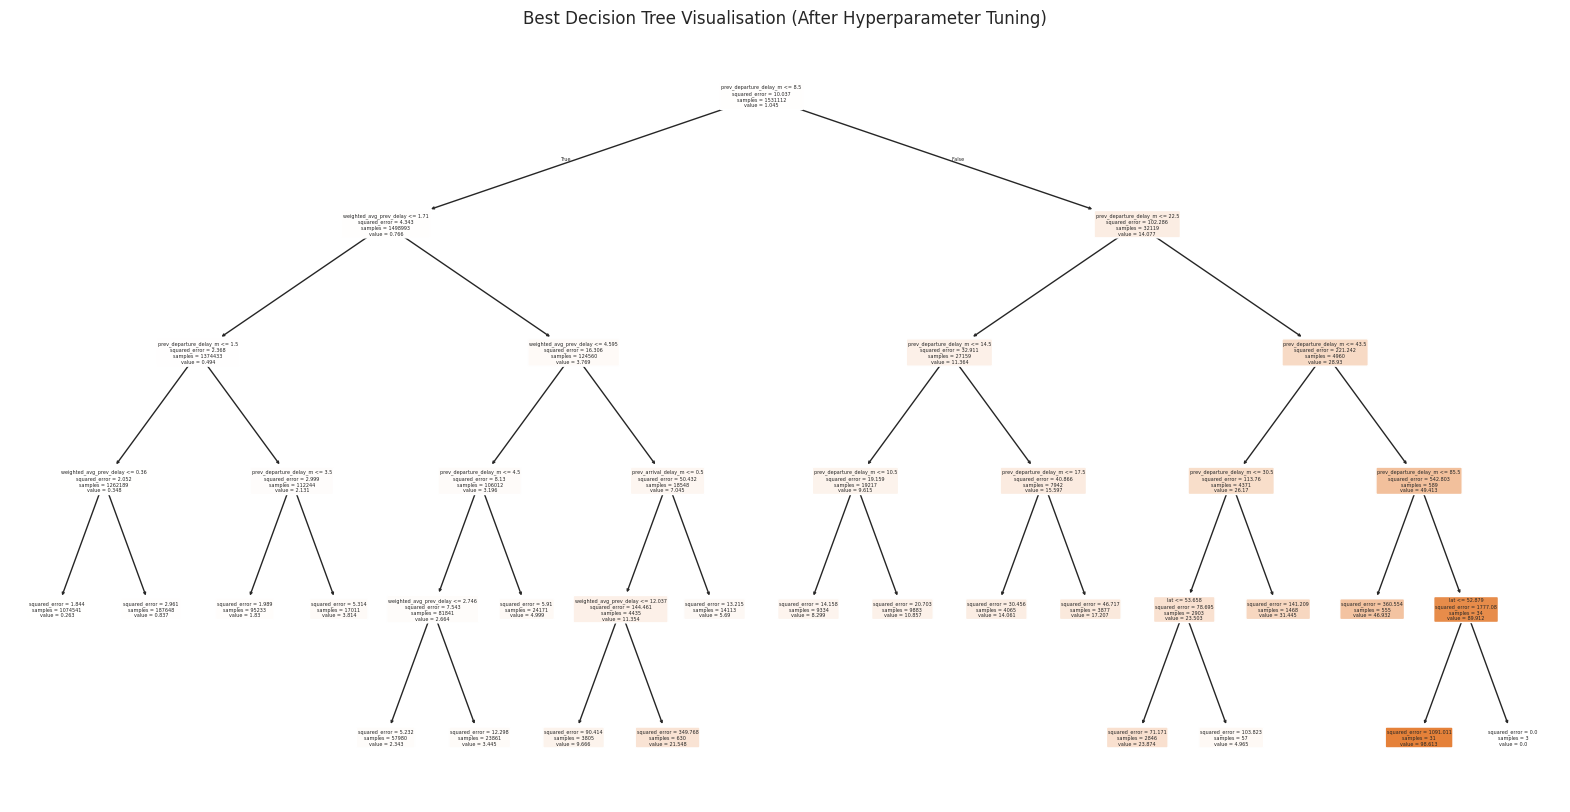

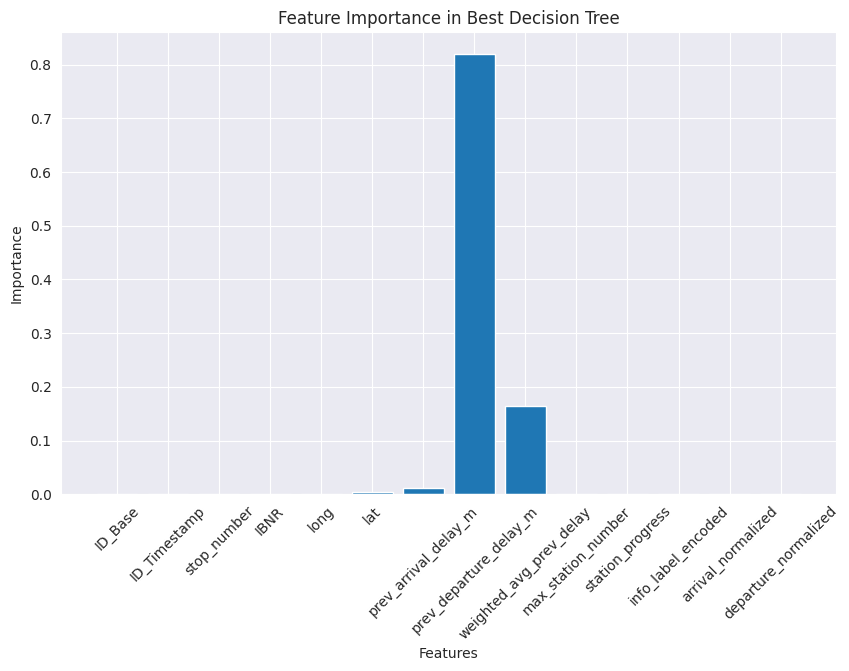

In [38]:
# Evaluate the best model
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("Best Decision Tree Regressor:")
print(f"Mean Absolute Error: {mae_tree}")
print(f"Mean Squared Error: {mse_tree}")
print(f"R-squared Score: {r2_tree}")

plt.figure(figsize=(20, 10))
plot_tree(
    best_tree,
    feature_names=X_train.columns,
    filled=True,
    rounded=True
)
plt.title("Best Decision Tree Visualisation (After Hyperparameter Tuning)")
plt.show()

# Plot feature importances from the best model
feature_importances = best_tree.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(X_train.columns, feature_importances)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance in Best Decision Tree")
plt.xticks(rotation=45)
plt.show()

Cross-Validation MAE: 0.7372 ± 0.0023


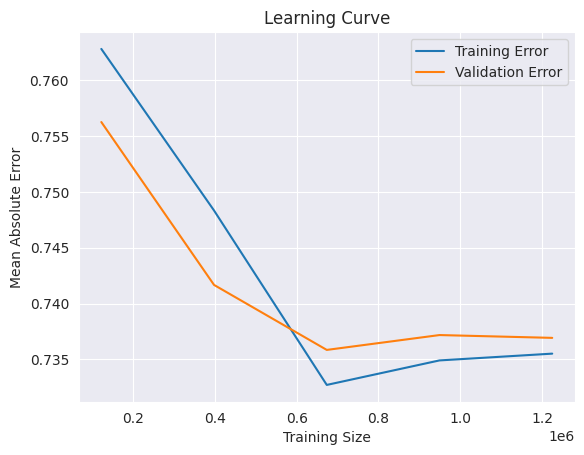

In [40]:
# Cross-validation with MAE
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_tree, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
mean_cv_mae = -np.mean(cv_scores)
std_cv_mae = np.std(cv_scores)
print(f"Cross-Validation MAE: {mean_cv_mae:.4f} ± {std_cv_mae:.4f}")

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_tree, X_train, y_train, cv=5, scoring="neg_mean_absolute_error", n_jobs=-1
)
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label="Training Error")
plt.plot(train_sizes, test_scores_mean, label="Validation Error")
plt.xlabel("Training Size")
plt.ylabel("Mean Absolute Error")
plt.title("Learning Curve")
plt.legend()
plt.show()

## Spatial MSE for Decision Tree

/tmp/ipykernel_188575/805922469.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spatial_mse = data.groupby(['lat_bin', 'lon_bin'])['squared_error'].mean().reset_index()


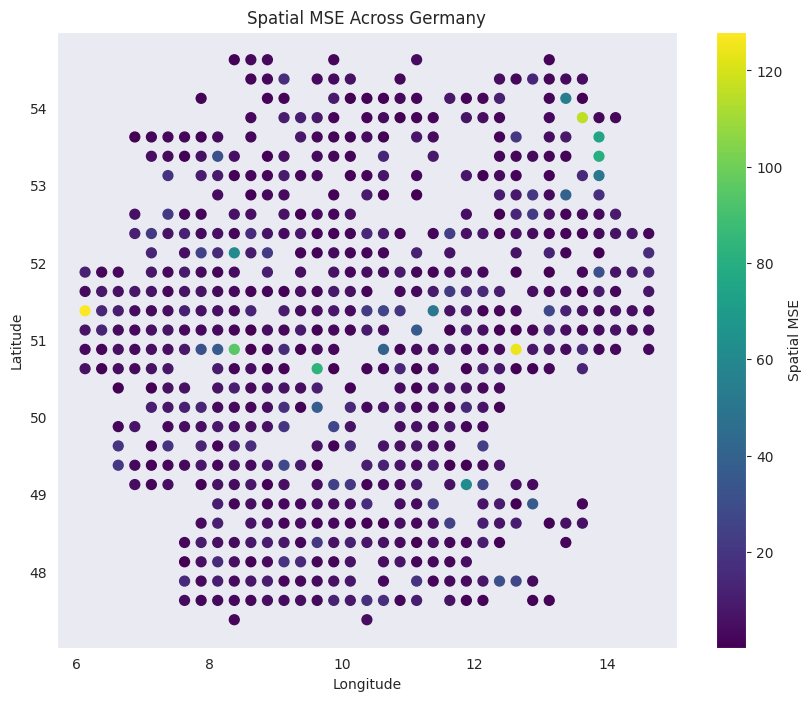

Overall Spatial MSE: 7.666644937004724


In [39]:
# Spatial MSE
# Define Germany's approximate geographic boundaries
germany_bounds = {
    'min_lat': 47.0, 'max_lat': 55.0,  # Latitude range
    'min_lon': 5.0, 'max_lon': 15.0  # Longitude range
}


# Create a grid over Germany
def create_grid(bounds, cell_size):
    lat_edges = np.arange(bounds['min_lat'], bounds['max_lat'], cell_size)
    lon_edges = np.arange(bounds['min_lon'], bounds['max_lon'], cell_size)
    return lat_edges, lon_edges


# Define grid cell size (in degrees)
cell_size = 0.25  # Adjust for desired resolution
lat_edges, lon_edges = create_grid(germany_bounds, cell_size)

# Assign test data points to grid cells
X_test['lat_bin'] = pd.cut(X_test['lat'], bins=lat_edges)
X_test['lon_bin'] = pd.cut(X_test['long'], bins=lon_edges)

# Combine with y_test and y_pred
data = pd.DataFrame({
    'lat_bin': X_test['lat_bin'],
    'lon_bin': X_test['lon_bin'],
    'y_test': y_test,
    'y_pred': y_pred_tree  # Using predictions from Linear Regression as an example
})

# Compute squared error
data['squared_error'] = (data['y_test'] - data['y_pred']) ** 2

# Group by grid cells and compute MSE
spatial_mse = data.groupby(['lat_bin', 'lon_bin'])['squared_error'].mean().reset_index()
spatial_mse.rename(columns={'squared_error': 'spatial_mse'}, inplace=True)

# Add grid cell centres for visualisation
spatial_mse['lat_center'] = spatial_mse['lat_bin'].apply(lambda x: x.mid)
spatial_mse['lon_center'] = spatial_mse['lon_bin'].apply(lambda x: x.mid)

# Visualise Spatial MSE
plt.figure(figsize=(10, 8))
plt.scatter(spatial_mse['lon_center'], spatial_mse['lat_center'], c=spatial_mse['spatial_mse'], cmap='viridis', s=50)
plt.colorbar(label='Spatial MSE')
plt.title('Spatial MSE Across Germany')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()

# Overall Spatial MSE
overall_spatial_mse = spatial_mse['spatial_mse'].mean()
print(f"Overall Spatial MSE: {overall_spatial_mse}")
X_test.drop(['lat_bin', 'lon_bin'], axis=1, inplace=True)

## Random Forest Regressor: Training and Evaluation

In [26]:
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest Regressor
ensemble_model = RandomForestRegressor(
    n_estimators=100,  # Number of trees
    max_depth=15,  # Maximum depth of the tree
    min_samples_split=50,  # Minimum number of samples required to split an internal node
    random_state=42,
    n_jobs=-1  # Use all available cores
)
ensemble_model.fit(X_train, y_train)

# Predictions
y_pred_rf = ensemble_model.predict(X_test)

# Evaluate Random Forest Model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor:")
print(f"Mean Squared Error: {mse_rf}")
print(f"Root Mean Squared Error: {rmse_rf}")
print(f"Mean Absolute Error: {mae_rf}")
print(f"R-squared Score: {r2_rf}")

Random Forest Regressor:
Mean Squared Error: 3.386001225572929
Root Mean Squared Error: 1.840109025458255
Mean Absolute Error: 0.6195712633655674
R-squared Score: 0.6750942707582379


## Spatial MSE for Random Forest

/tmp/ipykernel_188575/1257204010.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spatial_mse = data.groupby(['lat_bin', 'lon_bin'])['squared_error'].mean().reset_index()


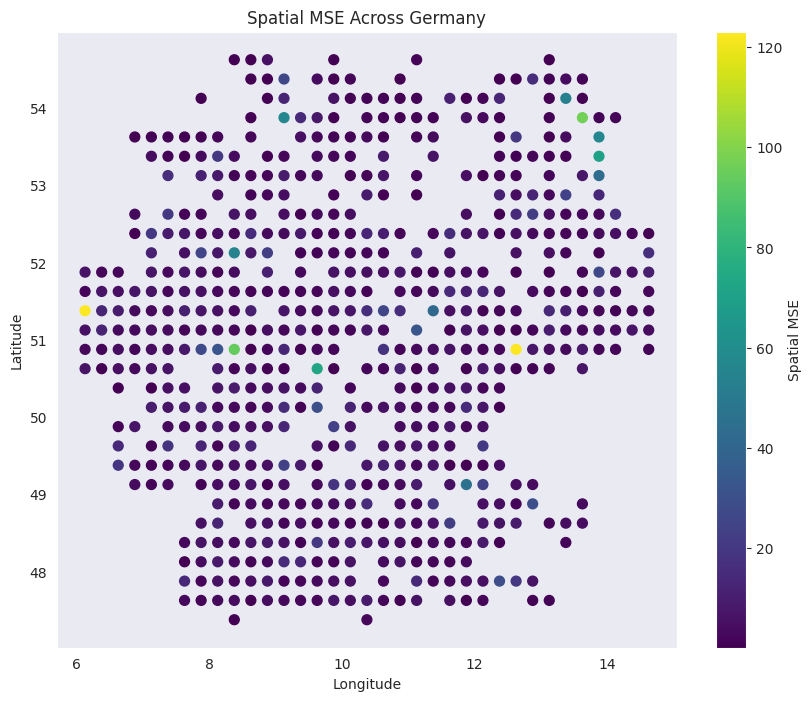

Overall Spatial MSE: 6.378693566157297


In [27]:
# Spatial MSE
# Define Germany's approximate geographic boundaries
germany_bounds = {
    'min_lat': 47.0, 'max_lat': 55.0,  # Latitude range
    'min_lon': 5.0, 'max_lon': 15.0  # Longitude range
}


# Create a grid over Germany
def create_grid(bounds, cell_size):
    lat_edges = np.arange(bounds['min_lat'], bounds['max_lat'], cell_size)
    lon_edges = np.arange(bounds['min_lon'], bounds['max_lon'], cell_size)
    return lat_edges, lon_edges


# Define grid cell size (in degrees)
cell_size = 0.25  # Adjust for desired resolution
lat_edges, lon_edges = create_grid(germany_bounds, cell_size)

# Assign test data points to grid cells
X_test['lat_bin'] = pd.cut(X_test['lat'], bins=lat_edges)
X_test['lon_bin'] = pd.cut(X_test['long'], bins=lon_edges)

# Combine with y_test and y_pred
data = pd.DataFrame({
    'lat_bin': X_test['lat_bin'],
    'lon_bin': X_test['lon_bin'],
    'y_test': y_test,
    'y_pred': y_pred_rf  # Using predictions from Linear Regression as an example
})

# Compute squared error
data['squared_error'] = (data['y_test'] - data['y_pred']) ** 2

# Group by grid cells and compute MSE
spatial_mse = data.groupby(['lat_bin', 'lon_bin'])['squared_error'].mean().reset_index()
spatial_mse.rename(columns={'squared_error': 'spatial_mse'}, inplace=True)

# Add grid cell centres for visualisation
spatial_mse['lat_center'] = spatial_mse['lat_bin'].apply(lambda x: x.mid)
spatial_mse['lon_center'] = spatial_mse['lon_bin'].apply(lambda x: x.mid)

# Visualise Spatial MSE
plt.figure(figsize=(10, 8))
plt.scatter(spatial_mse['lon_center'], spatial_mse['lat_center'], c=spatial_mse['spatial_mse'], cmap='viridis', s=50)
plt.colorbar(label='Spatial MSE')
plt.title('Spatial MSE Across Germany')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()

# Overall Spatial MSE
overall_spatial_mse = spatial_mse['spatial_mse'].mean()
print(f"Overall Spatial MSE: {overall_spatial_mse}")
X_test.drop(['lat_bin', 'lon_bin'], axis=1, inplace=True)

# Baseline Decision Tree

In [7]:
# Train a Decision Tree for Baseline Regression
baseline_regressor = DecisionTreeRegressor(max_depth=10,random_state=42)
baseline_regressor.fit(X_train, y_train)

# Predictions
baseline_predictions = baseline_regressor.predict(X_test)

# Evaluate Baseline Regression
baseline_mse = mean_squared_error(y_test, baseline_predictions)
baseline_mae = mean_absolute_error(y_test, baseline_predictions)

print("Baseline Regression:")
print(f"Mean Squared Error: {baseline_mse}")
print(f"Mean Absolute Error: {baseline_mae}")

Baseline Regression:
Mean Squared Error: 3.986913773287862
Mean Absolute Error: 0.6708798623141312


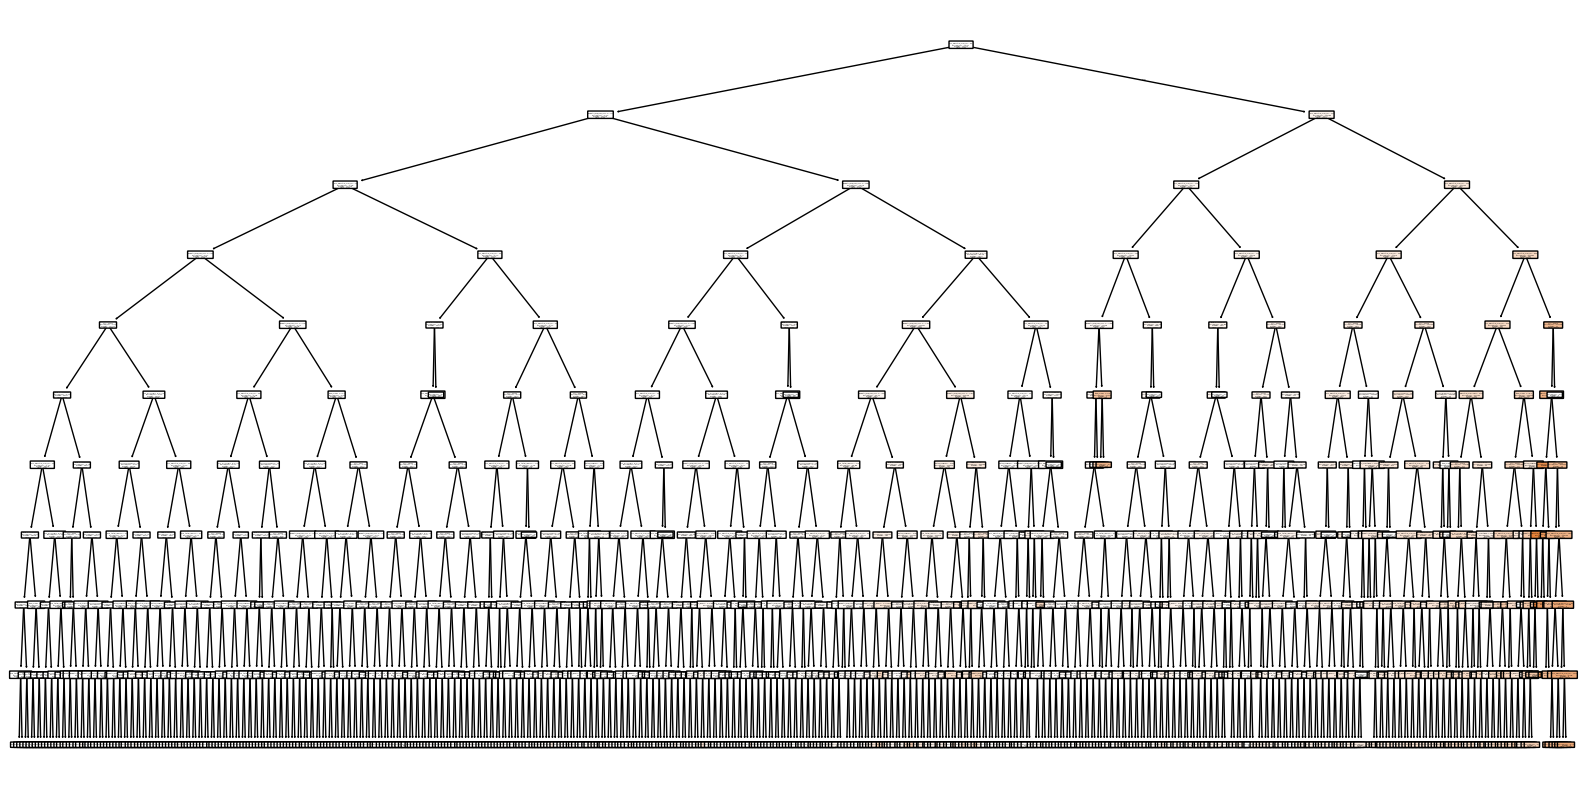

In [8]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming 'regressor' is your trained DecisionTreeRegressor
plt.figure(figsize=(20, 10))  # Adjust size as needed for readability
plot_tree(baseline_regressor, feature_names=X_train.columns, filled=True, rounded=True)
plt.show()

/tmp/ipykernel_32980/3219953062.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spatial_mse = data.groupby(['lat_bin', 'lon_bin'])['squared_error'].mean().reset_index()


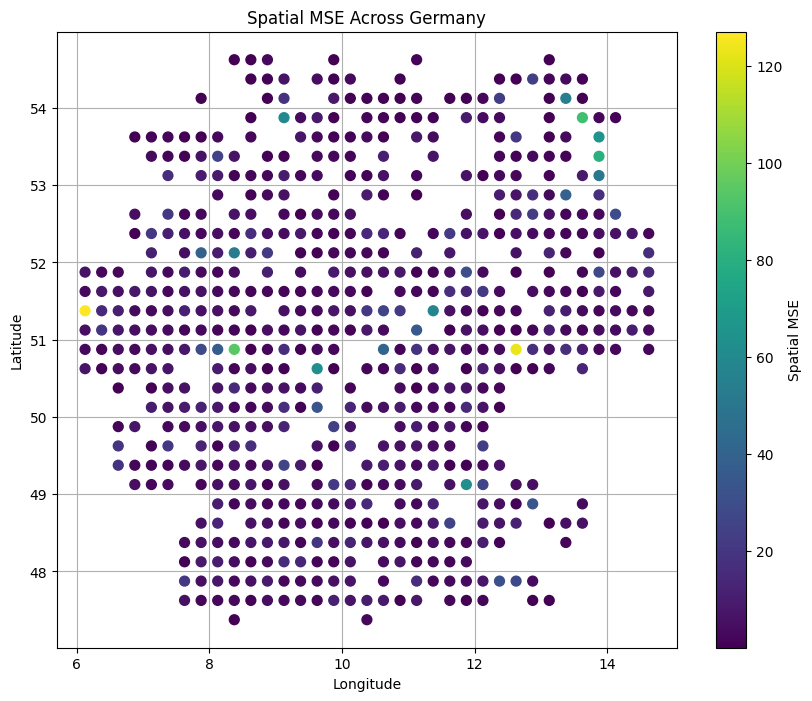

Overall Spatial MSE: 7.286143682449916


In [9]:
# Spatial MSE
# Define Germany's approximate geographic boundaries
germany_bounds = {
    'min_lat': 47.0, 'max_lat': 55.0,  # Latitude range
    'min_lon': 5.0, 'max_lon': 15.0  # Longitude range
}


# Create a grid over Germany
def create_grid(bounds, cell_size):
    lat_edges = np.arange(bounds['min_lat'], bounds['max_lat'], cell_size)
    lon_edges = np.arange(bounds['min_lon'], bounds['max_lon'], cell_size)
    return lat_edges, lon_edges


# Define grid cell size (in degrees)
cell_size = 0.25  # Adjust for desired resolution
lat_edges, lon_edges = create_grid(germany_bounds, cell_size)

# Assign test data points to grid cells
X_test['lat_bin'] = pd.cut(X_test['lat'], bins=lat_edges)
X_test['lon_bin'] = pd.cut(X_test['long'], bins=lon_edges)

# Combine with y_test and y_pred
data = pd.DataFrame({
    'lat_bin': X_test['lat_bin'],
    'lon_bin': X_test['lon_bin'],
    'y_test': y_test,
    'y_pred': baseline_predictions  # Using predictions from Linear Regression as an example
})

# Compute squared error
data['squared_error'] = (data['y_test'] - data['y_pred']) ** 2

# Group by grid cells and compute MSE
spatial_mse = data.groupby(['lat_bin', 'lon_bin'])['squared_error'].mean().reset_index()
spatial_mse.rename(columns={'squared_error': 'spatial_mse'}, inplace=True)

# Add grid cell centres for visualisation
spatial_mse['lat_center'] = spatial_mse['lat_bin'].apply(lambda x: x.mid)
spatial_mse['lon_center'] = spatial_mse['lon_bin'].apply(lambda x: x.mid)

# Visualise Spatial MSE
plt.figure(figsize=(10, 8))
plt.scatter(spatial_mse['lon_center'], spatial_mse['lat_center'], c=spatial_mse['spatial_mse'], cmap='viridis', s=50)
plt.colorbar(label='Spatial MSE')
plt.title('Spatial MSE Across Germany')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()

# Overall Spatial MSE
overall_spatial_mse = spatial_mse['spatial_mse'].mean()
print(f"Overall Spatial MSE: {overall_spatial_mse}")
X_test.drop(['lat_bin', 'lon_bin'], axis=1, inplace=True)

## Compare Error Rate per Quantile for All Models

In [30]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# 
# # Combine predictions into a single DataFrame
# results = pd.DataFrame({
#     'y_test': y_test,
#     'Linear': y_pred_lr,
#     'Lasso': y_pred_lasso,
#     'DecisionTree': y_pred_tree,
#     'RandomForest': y_pred_rf
# })
# 
# # Calculate absolute errors for each model
# for model in ['Linear', 'Lasso', 'DecisionTree', 'RandomForest']:
#     results[f'{model}_Error'] = abs(results['y_test'] - results[model])
# 
# # Define quantiles for error comparison
# quantiles = np.linspace(0, 1, 11)
# 
# # Compute errors per quantile for each model
# quantile_errors = {'Quantile': quantiles}
# for model in ['Linear', 'Lasso', 'DecisionTree', 'RandomForest']:
#     quantile_errors[model] = [results[f'{model}_Error'].quantile(q) for q in quantiles]
# 
# quantile_errors_df = pd.DataFrame(quantile_errors)
# 
# # Plot Quantile Errors
# plt.figure(figsize=(10, 6))
# for model in ['Linear', 'Lasso', 'DecisionTree', 'RandomForest']:
#     plt.plot(quantile_errors_df['Quantile'], quantile_errors_df[model], label=model)
# 
# plt.xlabel('Quantile')
# plt.ylabel('Absolute Error')
# plt.title('Error Rate per Quantile Across Models')
# plt.legend()
# plt.grid()
# plt.show()

## Export Test Data and Predictions for All Models

In [41]:
# Combine test data and predictions into a single DataFrame
export_data = pd.DataFrame({
    'y_test': y_test,  # Actual target values
    'Linear_Pred': y_pred_lr,  # Predictions from Linear Regression
    'Lasso_Pred': y_pred_lasso,  # Predictions from Lasso Regression
    'DecisionTree_Pred': y_pred_tree,  # Predictions from Decision Tree
    'RandomForest_Pred': y_pred_rf,  # Predictions from Random Forest
    'Baseline_Pred': baseline_predictions  # Predictions from Baseline Regression
})

# # Optionally include the feature columns from X_test
# for col in X_test.columns:
#     export_data[col] = X_test[col].values

# Export to CSV
export_data.to_csv("model_predictions.csv", index=False)

print("Export completed. File saved as 'model_predictions.csv'.")

Export completed. File saved as 'model_predictions.csv'.
